In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/cleaned_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,first_class,second_class,third_class,S,C,Q,norm_age,norm_sib_sp,norm_fare,norm_parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,1,0,0,0.304501,0.787623,0.071027,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,1,0,0.746132,0.787623,0.870605,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,0,0.434599,0.000000,0.213080,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,1,0,0,0.684951,0.787623,0.828411,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,1,0,0,0.684951,0.000000,0.246835,0.0


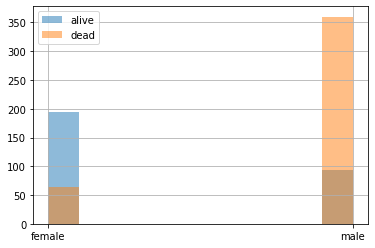

In [14]:
import matplotlib.pyplot as plt
df[df["Survived"] == 1].Sex.hist(alpha=0.5, label="alive")
df[df["Survived"] == 0].Sex.hist(alpha=0.5, label="dead")
plt.legend()
plt.show()

In [18]:
df[df["Survived"] == 1].Cabin.value_counts()

B96 B98            4
F33                3
B57 B59 B63 B66    2
D33                2
B35                2
                  ..
B42                1
E33                1
D49                1
E12                1
D37                1
Name: Cabin, Length: 94, dtype: int64

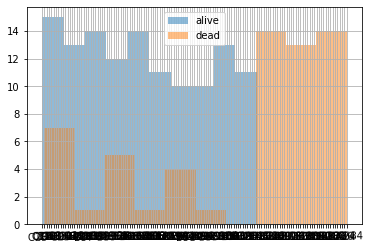

In [17]:
df[df["Survived"] == 1].Cabin.hist(alpha=0.5, label="alive", xrot=True)
df[df["Survived"] == 0].Cabin.hist(alpha=0.5, label="dead", xrot=True)
plt.legend()
plt.show()

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'male', 'female',
       'first_class', 'second_class', 'third_class', 'S', 'C', 'Q', 'norm_age',
       'norm_sib_sp', 'norm_fare', 'norm_parch'],
      dtype='object')

In [18]:
df["Survived"].value_counts()

0    424
1    288
Name: Survived, dtype: int64

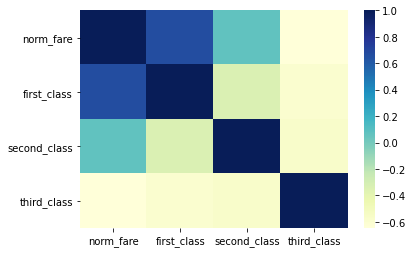

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df[["norm_fare", "first_class", "second_class", "third_class"]].corr(), cmap="YlGnBu")

In [6]:
table_embarked = pd.pivot_table(df, index="Embarked", values=["Survived"], aggfunc=[np.sum, len])
table_embarked["perc"] = (table_embarked[('sum', 'Survived')] / table_embarked[('len', 'Survived')]) * 100
table_embarked

,sum,len,perc
,Survived,Survived,
Embarked,,,
C,79,130,60.769231
Q,8,28,28.571429
S,201,554,36.281588


In [7]:
t_em_g = pd.pivot_table(df, index=["Embarked", "female"], values=["Survived"], aggfunc=[np.sum, len])
t_em_g

sum      len
                Survived Survived
Embarked female                  
C        0            24       69
         1            55       61
Q        0             1       16
         1             7       12
S        0            68      368
         1           133      186

In [8]:
print("C")
print(df[df["C"] == 1].Fare.describe())
print()
print("C Surv")
print(df[df["C"] == 1][df["Survived"] == 1].Fare.describe())
print()
print("Q")
print(df[df["Q"] == 1].Fare.describe())
print()
print("Q Surv")
print(df[df["Q"] == 1][df["Survived"] == 1].Fare.describe())
print()
print("S")
print(df[df["S"] == 1].Fare.describe())
print()
print("S Surv")
print(df[df["S"] == 1][df["Survived"] == 1].Fare.describe())

C
count    130.000000
mean      68.296767
std       90.557822
min        4.012500
25%       14.454200
50%       36.252100
75%       81.428100
max      512.329200
Name: Fare, dtype: float64

C Surv
count     79.000000
mean      85.641935
std      105.401586
min        7.225000
25%       19.258300
50%       57.979200
75%       91.079200
max      512.329200
Name: Fare, dtype: float64

Q
count    28.000000
mean     18.265775
std      21.843582
min       6.750000
25%       7.750000
50%       7.750000
75%      18.906250
max      90.000000
Name: Fare, dtype: float64

Q Surv
count     8.000000
mean     18.655212
std      28.871459
min       7.733300
25%       7.750000
50%       7.814600
75%       9.109400
max      90.000000
Name: Fare, dtype: float64

S
count    554.000000
mean      27.476284
std       36.546362
min        0.000000
25%        8.050000
50%       13.000000
75%       27.862500
max      263.000000
Name: Fare, dtype: float64

S Surv
count    201.000000
mean      39.599875
std      

<ipython-input-8-cb0471c58992>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["C"] == 1][df["Survived"] == 1].Fare.describe())
<ipython-input-8-cb0471c58992>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Q"] == 1][df["Survived"] == 1].Fare.describe())
<ipython-input-8-cb0471c58992>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["S"] == 1][df["Survived"] == 1].Fare.describe())


In [9]:
df["disc_age"] = pd.cut(df["Age"], 20)

In [10]:
df[df["Age"] < 2][["Survived", "Fare"]]

,Survived,Fare
58,1,29.0000
131,0,39.6875
137,1,11.1333
145,1,39.0000
242,1,151.5500
304,1,15.7417
308,0,46.9000
373,1,19.2583
508,1,19.2583
601,1,14.5000


In [11]:
pd.pivot_table(df, index="disc_age", values=["Survived"], aggfunc=[np.sum, len])

,sum,len
,Survived,Survived
disc_age,,
"(0.34, 4.399]",27,40
"(4.399, 8.378]",9,14
"(8.378, 12.357]",4,15
"(12.357, 16.336]",15,31
"(16.336, 20.315]",27,79
"(20.315, 24.294]",36,98
"(24.294, 28.273]",30,85
"(28.273, 32.252]",35,84


In [12]:
df["last_name"] = df["Name"].apply(lambda x: x.split(",")[0])

In [13]:
table = pd.pivot_table(df, index=["last_name", "Survived"], values="PassengerId", aggfunc=len)
table

PassengerId
last_name      Survived             
Abbing         0                   1
Abbott         0                   1
               1                   1
Abelson        0                   1
               1                   1
...                              ...
de Messemaeker 1                   1
de Mulder      1                   1
de Pelsmaeker  0                   1
del Carlo      0                   1
van Billiard   0                   1

[579 rows x 1 columns]

In [14]:
features = ["Survived", "male", "female", "first_class", "second_class", "third_class", "S", "C", "Q", "norm_age", "norm_sib_sp", "norm_fare", "norm_parch"]
df.to_csv('data/sanitized_input.csv', columns=features, index=False)